## Task - 10 (Exploratory Data Analysis)- INNOMATICS RESEARCH LAB
### BY SAHANA HEGDE

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

## Step-1

#### The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

## step-2

In [6]:
df = pd.read_excel('innomatics.xlsx')
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [7]:
df.head(10) #first 10 records

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,train,1027655,300000,2014-06-01,present,system engineer,Hyderabad,m,1992-07-02,89.92,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,train,947847,300000,2014-08-01,2015-05-01 00:00:00,java software engineer,Banglore,m,1993-02-01,86.08,...,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,train,912934,400000,2014-07-01,2015-07-01 00:00:00,mechanical engineer,Bangalore,m,1992-05-27,92.00,...,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470
8,train,552574,600000,2013-07-01,present,electrical engineer,Noida,m,1991-09-17,90.00,...,-1,-1,-1,-1,-1,-0.1590,0.5454,-0.6048,-0.74150,-0.2859
9,train,1203363,230000,2014-07-01,present,project engineer,Kolkata,m,1993-06-13,77.00,...,-1,-1,-1,-1,-1,-1.3080,0.5454,-0.9122,0.90660,0.0973


In [8]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [10]:
df.shape

(3998, 39)

In [13]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'Designation', 'JobCity', 'Gender',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [12]:
df.drop(['DOJ','DOB','DOL'],axis=1, inplace=True)
df.head()

,Unnamed: 0,ID,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,senior quality engineer,Bangalore,f,84.3,"board ofsecondary education,ap",2007,95.8,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,assistant manager,Indore,m,85.4,cbse,2007,85.0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,systems engineer,Chennai,f,85.0,cbse,2010,68.2,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,senior software engineer,Gurgaon,m,85.6,cbse,2007,83.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,get,Manesar,m,78.0,cbse,2008,76.8,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [14]:
df['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       1
0          1
Name: GraduationYear, dtype: int64

In [16]:
pd.crosstab(df["Salary"], df["12graduation"])

12graduation,1995,1998,1999,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Salary,,,,,,,,,,,,,,,,
35000,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0
40000,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
45000,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0
50000,0,0,0,0,0,0,0,0,1,2,1,0,1,0,0,0
55000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2600000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [17]:
df["Gender"].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [21]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
information science engineering                 27
electronics and instrumentation engineering     27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                             9
applied electronics and instrum

In [22]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [23]:
df['Designation'].value_counts()

software engineer                 539
software developer                265
system engineer                   205
programmer analyst                139
systems engineer                  118
                                 ... 
enterprise solutions developer      1
associate qa                        1
senior developer                    1
cloud engineer                      1
quality controller                  1
Name: Designation, Length: 419, dtype: int64

In [24]:
df['CollegeState'].value_counts()

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

In [25]:
df['JobCity'].value_counts()

Bangalore                627
-1                       461
Noida                    368
Hyderabad                335
Pune                     290
                        ... 
Delhi/NCR                  1
BHUBANESWAR                1
Tornagallu                 1
Maharajganj                1
new delhi - jaisalmer      1
Name: JobCity, Length: 339, dtype: int64

In [26]:
df.isnull().sum()  #checking for null values

Unnamed: 0               0
ID                       0
Salary                   0
Designation              0
JobCity                  0
Gender                   0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

### Step-3

**UNIVARIATE ANALYSIS**

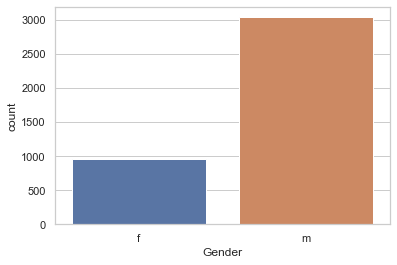

In [27]:
#countplot
sns.countplot(df['Gender'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E409C7E490>,
      dtype=object)

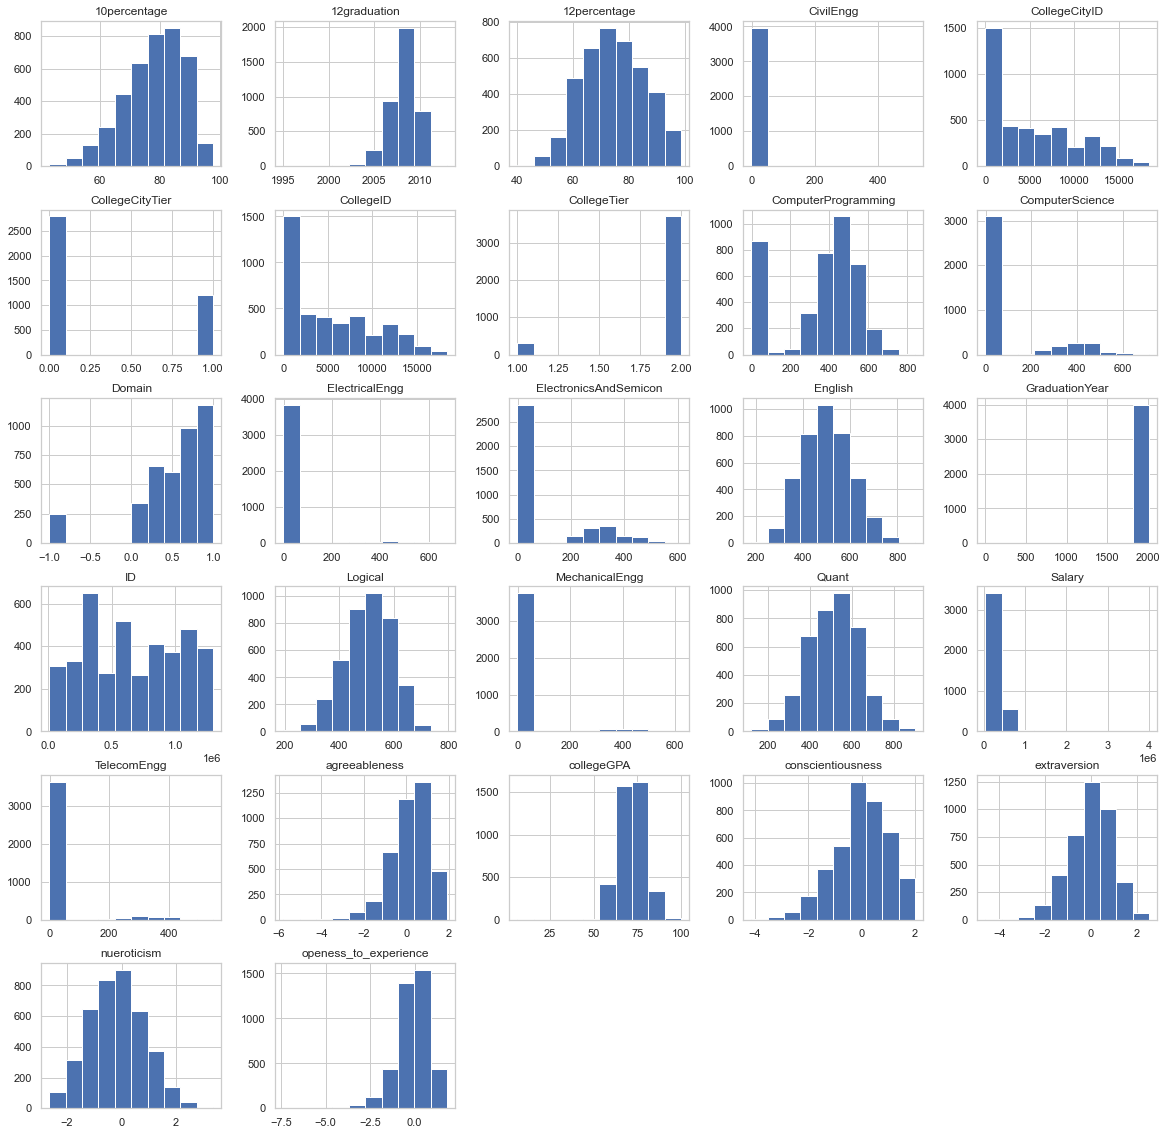

In [28]:
df.hist(figsize=(20,20))

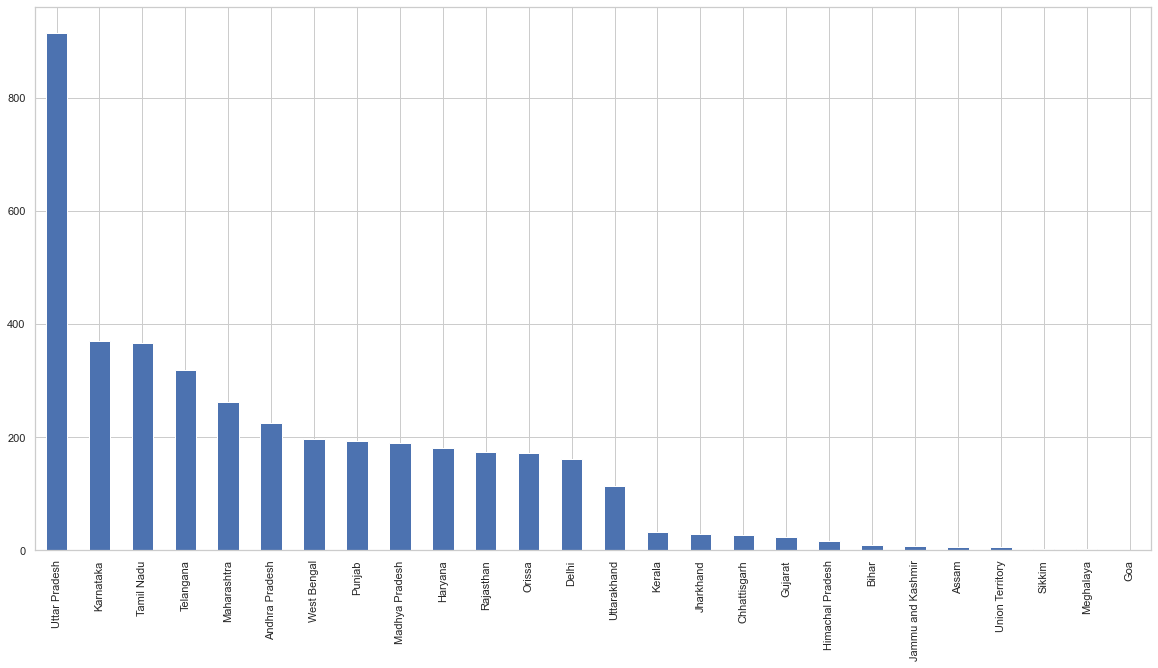

In [29]:
#Barplot
city = df['CollegeState'].value_counts()
city.plot(kind="bar",figsize=(20,10))

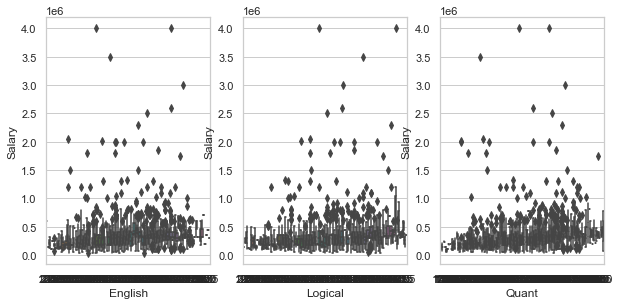

In [47]:
plt.figure(figsize = (10,10))
plt.subplot(2,3,1)
sns.boxplot(x=df["English"],y=df["Salary"])
plt.subplot(2,3,2)
sns.boxplot(x=df["Logical"],y=df["Salary"])
plt.subplot(2,3,3)
sns.boxplot(x=df["Quant"],y=df["Salary"])

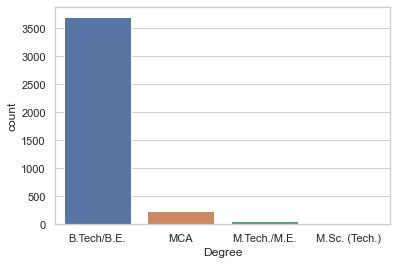

In [30]:
sns.countplot(df['Degree'])
# most of the students hold a B.tech or B.E as compared to the others offered

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

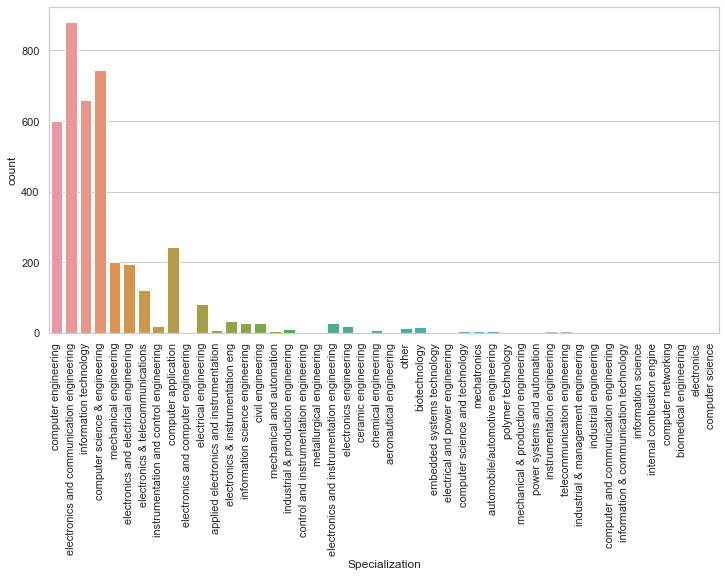

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(df['Specialization'])
plt.xticks(rotation=90)

# the maximum no of students are from electronics and communication engineering followed by computer science and engineering

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

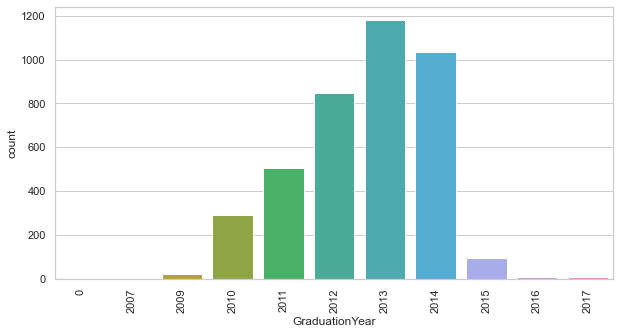

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(df['GraduationYear'])
plt.xticks(rotation=90)

# most of the students were graduated in 2013. Though the number of students graduated has increased over the yerars, a sharp drop is observed from 2014 to 2015.

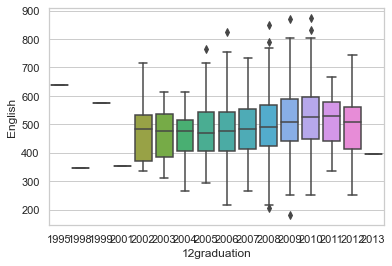

In [33]:
sns.boxplot(x=df["12graduation"],y=df["English"])

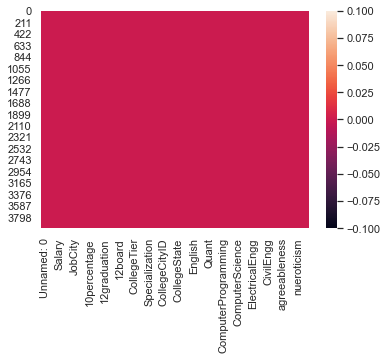

In [34]:
sns.heatmap(df.isnull())

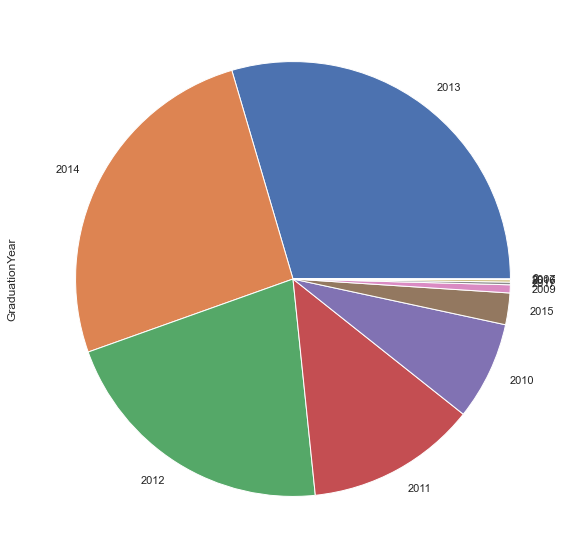

In [36]:
#Year wise analysis
birth = df['GraduationYear'].value_counts()
birth.plot(kind="pie",figsize=(10,10))

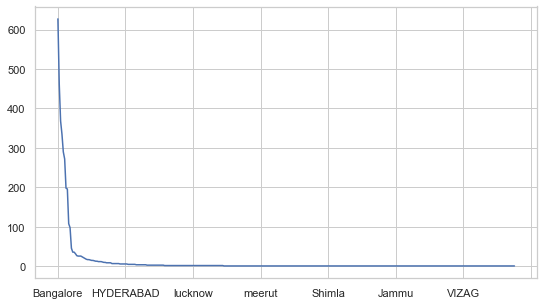

In [43]:
job_c = df['JobCity'].value_counts()
job_c.plot(kind="line",figsize=(9,5))

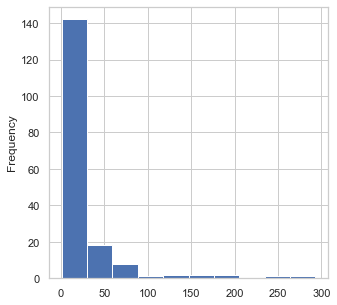

In [45]:
#Plotting of Salary
sal = df['Salary'].value_counts()
sal.plot(kind="hist",figsize=(5,5))

#### Conclusion about univariate analysis
1)Male candidates are preferred than female candidates.

2)More number of students from North india are choosen for the job roles.

3)Most students are from electronic background.

4)AMCAT scores of soft skills are normally distributed.

5)AMCAT scores of hard skills follows log normal distribution we can transform it to normal by box-cox transformation.

6)AMCAT scores of personality test follows normal distribution with positive skewness.

7)Candidates born on the year 1991 and 1992 more likely to crack the interview.

8)After getting selected for the job role, Candidates most likely to choose Banglore as their job city.

Salary for freshers is 55k to 2 lakhs.


### Step-4

### Bivariate analysis

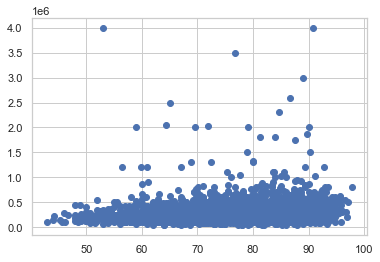

In [50]:
plt.scatter(df['10percentage'],df['Salary'])
plt.show()

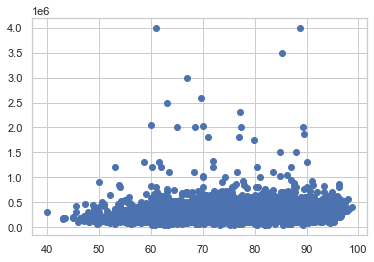

In [49]:
plt.scatter(df['12percentage'],df['Salary'])
plt.show()

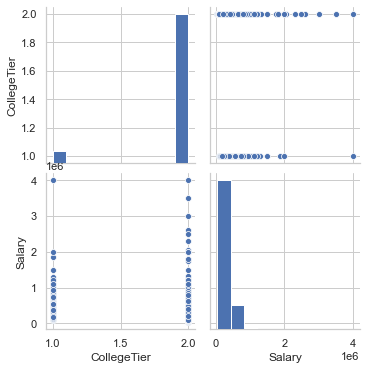

In [51]:
sns.pairplot(df,vars=['CollegeTier', 'Salary'])

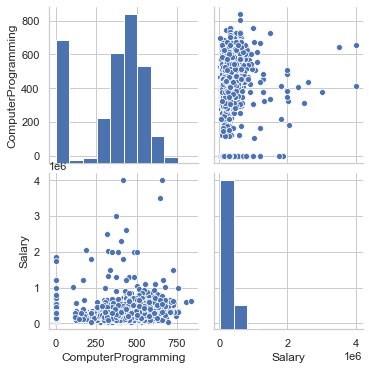

In [52]:
sns.pairplot(df,vars=['ComputerProgramming', 'Salary'])

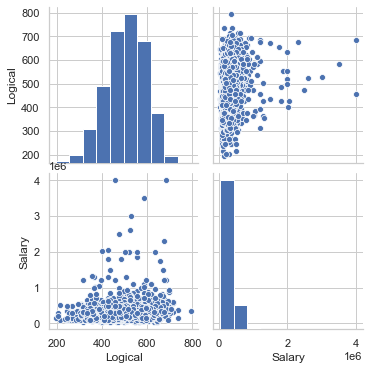

In [53]:
sns.pairplot(df,vars=['Logical', 'Salary'])

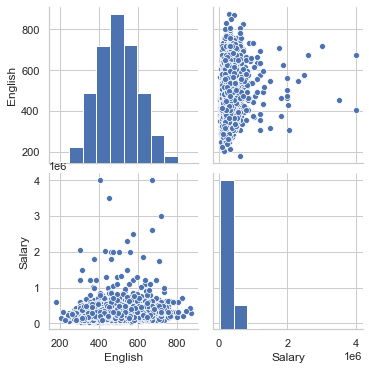

In [54]:
sns.pairplot(df,vars=['English', 'Salary'])

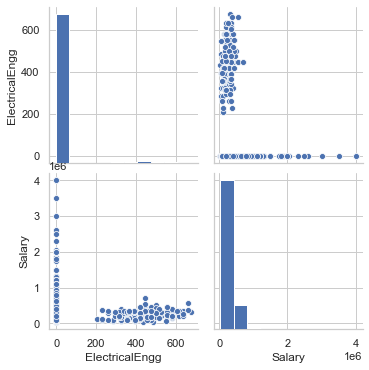

In [55]:
sns.pairplot(df,vars=['ElectricalEngg', 'Salary'])

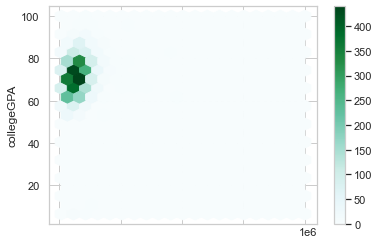

In [57]:
df.plot.hexbin(x='Salary', y='collegeGPA', gridsize=20)

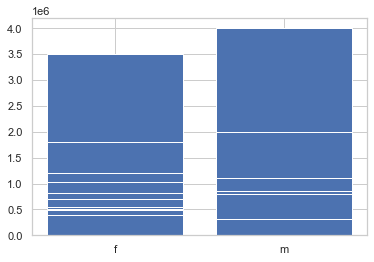

In [58]:
plt.bar(df['Gender'], df['Salary'])
plt.show()

# both genders have comparitively same salaries

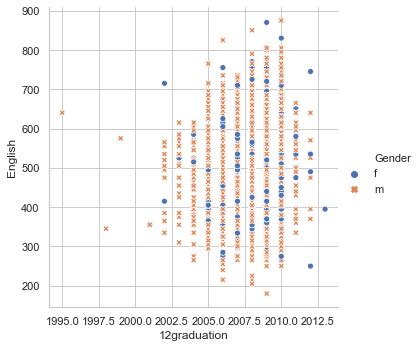

In [59]:
sns.relplot(x="12graduation", y="English", hue="Gender", style="Gender", data=df);

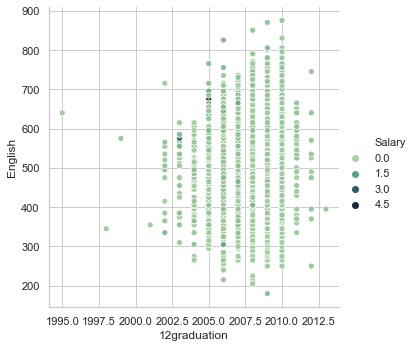

In [60]:
sns.relplot(x="12graduation", y="English", hue="Salary", palette="ch:r=-.5,l=.75", data=df);

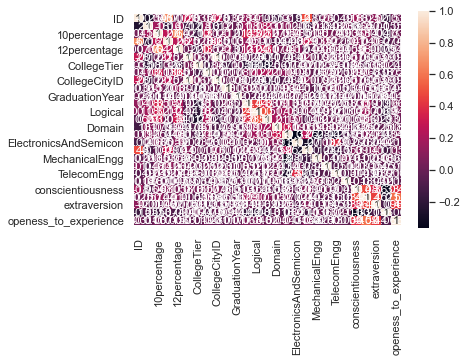

In [77]:
ax=sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

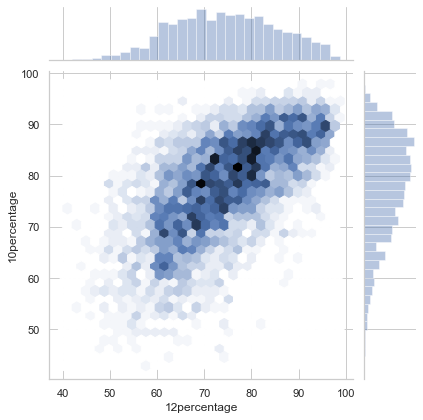

In [61]:
#Hexbin for school grades.
sns.jointplot(x=df['12percentage'],y=df['10percentage'],kind='hex',data=df)

#### Observations from Bivariate analysis:
Salary does not depends on the GPA scored by an student.
Most of the B.tech candidates are hired with an average of 70%.
Most of the Engineers are male compared to female.
Salary seems to be independent of gender, except few high packages for males.
The correlation heat map gives a detailed correation between numerical columns.
More number of candidates scored 70% in both 12th and 10th grade.

In [ ]:
Observations from Bivariate analysis:
Salary does not depends on the GPA scored by an student.
Most of the B.tech candidates are hired with an average of 70%.
Most of the Engineers are male compared to female.
Salary seems to be independent of gender, except few high packages for males.
The correlation heat map gives a detailed correation between numerical columns.
More number of candidates scored 70% in both 12th and 10th grade.

In [62]:
# from the above plot we can assume that both the columns have good relationship

### Step-6
Conclusion

We can conclude that the Salary column is mainly affected by columns like Domain, Quant, CollegeGPA, Logical, English, Collegetier, Specialization. There is not much relation with Salary for columns like Gender, 12graduation, 10board,12 board,JobCity, CollegeID

### Research Questions
Q1) Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)


# SOLUTION

In [63]:
#Frequency distribution
pd.crosstab(df['Specialization'],df['Gender'],margins = True)

Gender,f,m,All
Specialization,,,
aeronautical engineering,1,2,3
applied electronics and instrumentation,2,7,9
automobile/automotive engineering,0,5,5
biomedical engineering,2,0,2
biotechnology,9,6,15
ceramic engineering,0,1,1
chemical engineering,1,8,9
civil engineering,6,23,29
computer and communication engineering,0,1,1


In [64]:
#observed frequencies
observed=pd.crosstab(df['Specialization'],df['Gender'])

### CONCLUSION:
From the info, we have a dataset of 3998 rows and 39 columns.
The Univariate analysis gives a wide view about individual numerical as well as categorical variable.
The Bivariate analysis gives a clear view about the relationship of various numerical with categorical variable.
From the Chi squared test, it is observed that the preference of specialization depends on gender.
The rejection area lies on the right region.
The salary is same for both the gender candidates.
More number of male candidates likely to make the employment possible, according to this dataset.